# Plot fig. 7.5

Theme Song: Purple Haze<br>
Artist: Jimi Hendrix<br>
Album: Are You Experienced<br>
Released: 1967

In [1]:
from __future__ import division
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as pl
import pandas as pd
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
from netCDF4 import Dataset
import warnings

In [2]:
#pl.rcParams.keys()

In [3]:
#%matplotlib inline

pl.rcParams['figure.figsize'] = (9/2.54, 9/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['figure.dpi'] = 150
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = False
pl.rcParams['ytick.major.right'] = True
pl.rcParams['ytick.labelright'] = True
pl.rcParams['ytick.major.size'] = 0
pl.rcParams['ytick.major.pad'] = -56
pl.rcParams['xtick.top'] = False

In [4]:
# add models from Zelinka 14
# + 5% land surface adjustment

z14_data = np.array([
    [-0.66, 0.28, -0.24, -0.01, 0.15, 0.01, -0.22], #'IPSL-CM5A-LR'
    [-0.58, 0.17, -0.51, 0.01, -0.01, 0.11, -0.04], #'CanESM2'
    [-0.63, 0.29, -0.80, 0.03, 0.18, 0.13, -0.17], #'NorESM1-M'
    [-1.13, 0.49, -0.76, 0.08, 0.00, -0.02, -0.21], #'CSIRO-Mk3-6-0'
    [-0.53, 0.26, -1.00, 0.06, -0.13, 0.14, -0.05], #'HadGEM2-A'
    [-0.91, 0.41, -0.99, -0.03, -0.13, 0.11, 0.02], #'GFDL-CM3'
    [-0.66, 0.16, -0.93, -0.01, -0.28, 0.22, 0.27], #'MIROC5'
    [-0.11, 0.12, -1.77, -0.09, -0.23, 0.00, 0.95], #'MRI-CGCM3'
    [-0.33, 0.21, -1.93, 0.06, -0.11, 0.17, 0.57], #'CESM1-CAM5'
])
print(z14_data[:,0])
ERFariCMIP5 = 1.05 * (z14_data[:,0]+z14_data[:,1]+z14_data[:,5])
ERFaciCMIP5 = 1.05 * (z14_data[:,2]+z14_data[:,3]+z14_data[:,4]+z14_data[:,6])
ERFCMIP5 = ERFariCMIP5+ERFaciCMIP5
print(ERFCMIP5)

[-0.66 -0.58 -0.63 -1.13 -0.53 -0.91 -0.66 -0.11 -0.33]
[-0.7245 -0.8925 -1.0185 -1.6275 -1.3125 -1.596  -1.2915 -1.1865 -1.428 ]


In [5]:
df = pd.read_csv('../data_output/table7.6.csv', index_col=0)
df.drop(['CMIP6 mean', 'CMIP6 range', 'CMIP5 mean', 'CMIP5 range'], axis=0, inplace=True)
df

,ERFari,ERFaci,ERFari+aci
Model,,,
ACCESS-CM2,-0.235259,-0.934384,-1.169643
ACCESS-ESM1-5,-0.066539,-1.185870,-1.252409
BCC-ESM1,-0.790036,-0.693827,-1.483863
CanESM5,-0.022020,-1.092384,-1.114403
CESM2,0.153640,-1.652685,-1.499045
CNRM-CM6-1,-0.275668,-0.860187,-1.135855
CNRM-ESM2-1,-0.148888,-0.637017,-0.785905
EC-Earth3,-0.388985,-0.503320,-0.892306
GFDL-CM4,-0.118052,-0.718092,-0.836143


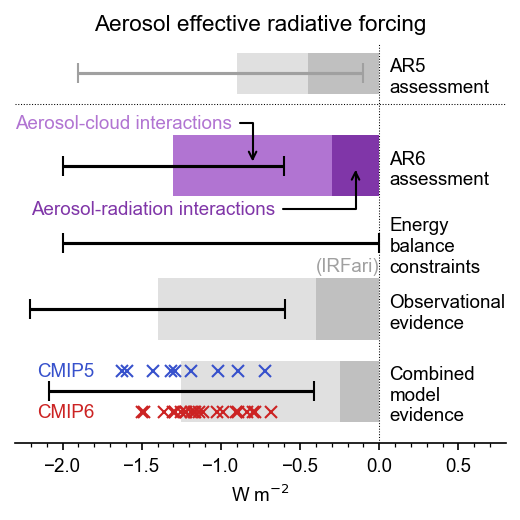

In [6]:
# from the FGD-approved "dark" palette
colors_erfari = {
    'red1': '#dd512e',
    'blue1': '#2134db',
    'cyan': '#35a5c5',
    'red2': '#aa1818',
    'blue2': '#082e72',
    'orange': '#ec9c2e',
    'green': '#327f51',
    'purple': '#8036a8',
    'grey': '#c0c0c0',
    'aerosol': '#66665f'
}

# as above with 30% added to lightness
colors_erfaci = {
    'red': '#f2bdb0',
    'blue1': '#a2aaf1',
    'cyan': '#aadbe9',
    'red2': '#eb7070',
    'blue2': '#246ff0',
    'orange': '#f8deb9',
    'green': '#7ecd9e',
    'purple': '#b174d2',
    'grey': '#e0e0e0',
    'aerosol': '#9b9b92'
}

fig, ax1 = pl.subplots()
ariaci_mmm = (df.ERFari.mean()+df.ERFaci.mean())

model_erfari = -0.25
model_erfaci = -1.00
model_erfari_u90 = 0.25
model_erfaci_u90 = 0.80
model_total_u90 = np.sqrt(model_erfari_u90**2 + model_erfaci_u90**2)

obs_erfari = -0.40
obs_erfaci = -1.00
obs_erfari_u90 = 0.40
obs_erfaci_u90 = 0.70
obs_total_u90 = np.sqrt(obs_erfari_u90**2 + obs_erfaci_u90**2)

ar6_erfari = -0.30
ar6_erfaci = -1.00
ar6_erfari_u90 = 0.30
ar6_erfaci_u90 = 0.70
ar6_total_u90 = 0.70

ar5_erfari = -0.45
ar5_erfaci = -0.45
ar5_total = ar5_erfari + ar5_erfaci
ar5_total_pc05 = -1.90
ar5_total_pc95 = -0.10

# Models
ax1.barh(0, model_erfari, height=0.6, color=colors_erfari['grey'])
ax1.barh(0, model_erfaci, height=0.6, left = model_erfari, color=colors_erfaci['grey'], xerr=model_total_u90, capsize=5)
# plot CMIP5 and CMIP6 models : BOTH CONTAIN +5% FOR LAND SURFACE ADJUSTMENT
for model in df.index:
    point = np.mean(df.ERFari[model] + df.ERFaci[model])
    ax1.plot(point, -0.2, color='#cc2323', marker='x', zorder=10)
for erf in ERFCMIP5:
    ax1.plot(erf, 0.2, color='#3751cc', marker='x', zorder=10)
ax1.text(-1.8, 0.2, 'CMIP5', color='#3751cc', ha='right', va='center')
ax1.text(-1.8, -0.2, 'CMIP6', color='#cc2323', ha='right', va='center')

# Observations
ax1.barh(0.8, obs_erfari, height=0.6, color=colors_erfari['grey'], hatch=None)
ax1.barh(0.8, obs_erfaci, height=0.6, left=obs_erfari, color=colors_erfaci['grey'], xerr=obs_total_u90, capsize=5)
ax1.text(-0.2, 1.13, '(IRFari)', ha='center', va='bottom', color='#a0a0a0')

# Energy balance
ax1.errorbar(-1, 1.45, xerr=1, capsize=5, color='k')
        
## plot AR6 ranges
ax1.barh(2.2, ar6_erfari, height=0.6, color=colors_erfari['purple'])
ax1.barh(2.2, ar6_erfaci, height=0.6, left=ar6_erfari, color=colors_erfaci['purple'], xerr=ar6_total_u90, capsize=5)
ax1.annotate(
    "Aerosol-radiation interactions",
    xy=(-0.15, 2.2),
    xycoords='data',
    xytext=(-2.2, 1.87), ha='left', va='top', color=colors_erfari['purple'],
    arrowprops={
        'arrowstyle':'->', 
        'connectionstyle':'angle,angleA=0,angleB=90',
    }
)
ax1.annotate(
    "Aerosol-cloud interactions",
    xy=(-0.8, 2.2),
    xycoords='data',
    xytext=(-2.3, 2.53), ha='left', va='bottom', color=colors_erfaci['purple'],
    arrowprops={
        'arrowstyle':'->', 
        'connectionstyle':'angle,angleA=0,angleB=90',
    }
)

# divider
ax1.axhline(2.8, ls=':', lw=0.5, color='k')

## plot AR5 ranges
ax1.barh(3.1, ar5_erfari, height=0.4, color=colors_erfari['grey'])
ax1.barh(3.1, ar5_erfaci, height=0.4, left=ar5_erfari, color=colors_erfaci['grey'], 
         xerr=np.array([ar5_total-ar5_total_pc05, ar5_total_pc95-ar5_total]).reshape(2,1), capsize=5, error_kw=dict(ecolor='#a0a0a0'))
ax1.get_yticklabels()[-1].set_color('#c0c0c0')

ax1.tick_params(axis='y', which='both', left=False, right=False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()

ax1.set_ylim(-0.5,3.4)
ax1.set_xlim(-2.3,0.8)
ax1.axvline(0, color='k', lw=0.5, ls=':')
ax1.set_yticks([0.0, 0.8, 1.45, 2.2, 3.1])
ax1.set_yticklabels(['Combined\nmodel\nevidence', 'Observational\nevidence', 'Energy\nbalance\nconstraints', 'AR6\nassessment', 'AR5\nassessment'])
ax1.set_xlabel('W m$^{-2}$')
ax1.set_title('Aerosol effective radiative forcing')

pl.tight_layout()
pl.savefig('../figures/fig7.5.png', dpi=300)
pl.savefig('../figures/fig7.5.pdf')